# Analiza danych z wyliczonych modeli sieci
*** 
#### Import niezbędnych bibliotek
#### Wczytywanie pliku i wyświetlanie jego właściwości

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


configurations = np.load("captured_randoms_from_combined.npy", allow_pickle = True)  #ładowanie danych z pliku
print(type(configurations))
print("dtype:", configurations.dtype)
print("ndim: ", configurations.ndim)
print("shape:", configurations.shape)
print("size: ", configurations.size)




<class 'numpy.ndarray'>
dtype: object
ndim:  2
shape: (50, 6)
size:  300


#### Stworzenie tablic poszczególnych z wczytanego np.array

In [14]:
msa = configurations[:,0]
layerz = configurations[:,3]
epok = configurations[:,1]
weights = configurations[:,2]
neurs = configurations[:,4]


#### Tworzenie wykresu punktowego przedstawiającego zależności ilości warstw od średniego błędu

Text(0.5, 0, 'Liczba ukrytych warstw')

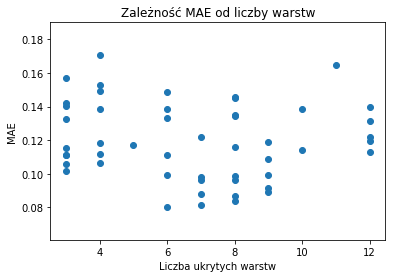

In [15]:
plt.figure()
plt.scatter(layerz, msa)
plt.title('Zależność MAE od liczby warstw')
plt.ylabel('MAE')
plt.xlabel("Liczba ukrytych warstw")

#### Tworzenie wykresu punktowego pokazującego zależność wyniku MAE od liczby epochów

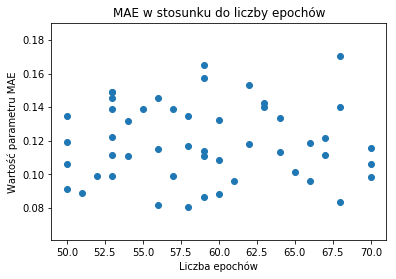

In [16]:
plt.figure()
plt.scatter(epok, msa)
plt.title('MAE w stosunku do liczby epochów')
plt.ylabel('Wartość parametru MAE')
plt.xlabel('Liczba epochów')
plt.show()

#### Tworzenie wykresu punktowego przedstawiającego zależności sumy ilości neuronów w warstwach od MSA

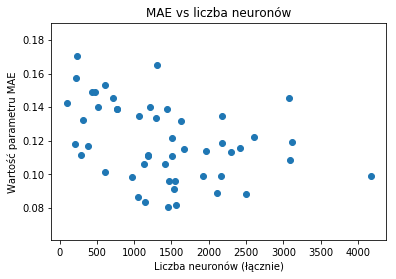

In [17]:
#ZLICZANIE ILOŚCI NEURONÓW W POSZCZEGÓLNYCH WARSTWACH ORAZ ZAPIS DO NOWEJ TABLICY
neu = np.zeros(len(neurs))
#print(neurs.shape, neu.shape)
i=0
k=0
while i< len(neurs):
        pom = 0
        while k < len(neurs[i]):
            pom += neurs[i][k]
            k+=1
        neu[i] = pom
        i+=1
        k=0
#print(neu)

plt.figure()
plt.scatter(neu, msa)
plt.title('MAE vs liczba neuronów')
plt.ylabel('Wartość parametru MAE')
plt.xlabel('Liczba neuronów (łącznie)')
plt.show()

### Tworzenie dataFrame z danych tablic w celu wyświetlenia tabeli posortowanej w kolejności od najlepszych modeli

In [18]:
r = pd.DataFrame({ 
    'MAE': msa,
    'Epochs':  epok,
    'Weights':  weights,
    'Layers':  layerz,
    'Neurons':  neurs})

vis = r.sort_values(by = ['MAE'], ascending = True)
print(vis.head(5))


          MAE Epochs         Weights Layers  \
8   0.0802772     58    [1, 1, 1, 1]      6   
26  0.0814322     56  [1, 1, 1, 1.5]      7   
25  0.0835854     68    [1, 1, 1, 1]      8   
37  0.0866523     59    [1, 2, 1, 1]      8   
16  0.0881334     60    [1, 1, 1, 1]      7   

                                  Neurons  
8            [32, 16, 512, 512, 128, 256]  
26      [64, 128, 128, 128, 64, 32, 1024]  
25  [128, 32, 512, 32, 128, 64, 128, 128]  
37  [128, 64, 256, 32, 256, 128, 128, 64]  
16    [512, 1024, 128, 64, 128, 512, 128]  
